In [110]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
data_path = "/home/maksim/datasets/Почищенный датасет с нормализованным эстимейтом - data_set_last7.csv"
data = pd.read_csv(data_path)

In [112]:
col_to_drop = ["sale_date", "Price","Owner","Size","EstimateFrom","EstimateTo","Time",
            "Description", "tried_url", "Image", "normalized_estimatefrom", 
            "normalized_estimateto"]

data.drop(columns=col_to_drop, inplace=True)

In [113]:
data.loc[data["normalized_price"] == 0, "normalized_price"] = 10**-10 #To take log
data["log10(normalized_price)"] = np.log10(data["normalized_price"]) 
data.drop(columns=["normalized_price"], inplace=True)

In [114]:
data.head()

,Author,Art,Sign,Technique,Material,Nazi,Framed,square_m,Currency,ExhibitedNum,...,number_of_day,day_of_week,month,year,deal_time_(utc),hasFollowers,hasAfter,isUntitled,isNumbered,log10(normalized_price)
0,willem de kooning,UNTITLED (WOMAN),1,oil,paper,0,0,0.0925,USD,5,...,344,Monday,12,2018,17:00,0,1,1.0,1.0,4.962042
1,willem de kooning,UNTITLED (STILL LIFE),1,oil,board,0,0,0.0601,USD,3,...,344,Monday,12,2018,17:00,0,1,1.0,0.0,4.962042
2,georgia o′keeffe,UNTITLED (ALLIGATOR PEAR IN RED DISH),0,oil,canvas,0,0,0.0516,USD,0,...,65,Thursday,3,2020,15:00,0,0,1.0,0.0,5.698970
3,franz kline,UNTITLED,1,oil,canvas,0,0,0.1144,USD,1,...,344,Monday,12,2018,17:00,0,0,1.0,0.0,3.910890
4,franz kline,UNTITLED,1,ink,paper,0,0,0.0590,USD,11,...,344,Monday,12,2018,17:00,0,0,1.0,0.0,4.551868


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14537 entries, 0 to 14536
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Author                   14537 non-null  object 
 1   Art                      14537 non-null  object 
 2   Sign                     14537 non-null  int64  
 3   Technique                14537 non-null  object 
 4   Material                 14537 non-null  object 
 5   Nazi                     14537 non-null  int64  
 6   Framed                   14537 non-null  int64  
 7   square_m                 14537 non-null  float64
 8   Currency                 14537 non-null  object 
 9   ExhibitedNum             14537 non-null  int64  
 10  ProvenanceNum            14537 non-null  int64  
 11  LiteratureNum            14537 non-null  int64  
 12  CataloguingLength        14537 non-null  int64  
 13  City                     14536 non-null  object 
 14  date_of_birth         

p-value is 4.760675397940822e-11


sex,F,M
Price_cat,,
1,11,1540
2,34,5729
3,63,4512
4,61,2587


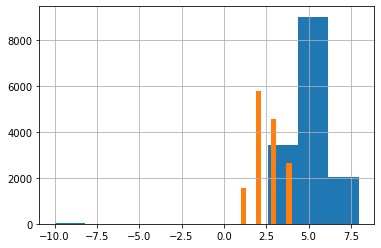

In [134]:
from scipy.stats import chi2_contingency 

data['log10(normalized_price)'].hist()

data['Price_cat'] = None
data.loc[data['log10(normalized_price)'] <= 4, 'Price_cat'] = 1
data.loc[(data['log10(normalized_price)'] > 4) & (data['log10(normalized_price)'] <= 5), 'Price_cat'] = 2
data.loc[(data['log10(normalized_price)'] > 5) & (data['log10(normalized_price)'] <= 6), 'Price_cat'] = 3
data.loc[data['log10(normalized_price)'] > 6, 'Price_cat'] = 4

data['Price_cat'].hist()

data_crosstab = pd.crosstab(data['Price_cat'], data['sex'], margins = False) 

stat, p, dof, expected = chi2_contingency(data_crosstab) 
print("p-value is {}".format(p))
data_crosstab

p-value is 0.0


Framed,0,1
Price_cat,,
1,896,655
2,3811,1952
3,3947,628
4,2565,83


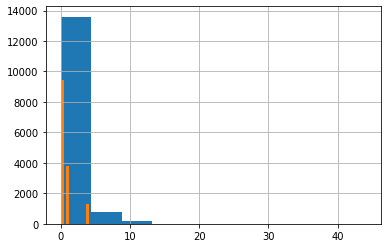

In [152]:
data.LiteratureNum.hist()
data["Lit_cat"] = None
data.loc[data['LiteratureNum'] == 0, 'Lit_cat'] = 0
data.loc[(data['LiteratureNum'] > 0) & (data['LiteratureNum'] < 4), 'Lit_cat'] = 1
#data.loc[(data['LiteratureNum'] >= 2) & (data['LiteratureNum'] < 4), 'Lit_cat'] = 2
#data.loc[(data['LiteratureNum'] >= 4) & (data['LiteratureNum'] < 6.5), 'Lit_cat'] = 3
data.loc[(data['LiteratureNum'] >= 4), 'Lit_cat'] = 4

data['Lit_cat'].hist()

data_crosstab = pd.crosstab(data['Price_cat'], data['Framed'], margins = False) 

stat, p, dof, expected = chi2_contingency(data_crosstab) 
print("p-value is {}".format(p))
data_crosstab

In [25]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2)

train_label = train_set["log10(normalized_price)"]
test_label = test_set["log10(normalized_price)"]

train_index = train_set[["Author", "Art"]]
test_index = test_set[["Author", "Art"]]

train_set = train_set.drop(columns=["Author", "Art"]).copy()
test_set = test_set.drop(columns=["Author", "Art"]).copy()

In [26]:
train_set.describe()

,Sign,Nazi,Framed,square_m,ExhibitedNum,ProvenanceNum,LiteratureNum,CataloguingLength,date_of_birth,date_of_death,century,repeat_sale,number_of_day,month,year,hasFollowers,hasAfter,isUntitled,isNumbered,log10(normalized_price)
count,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,10763.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11621.000000,11624.000000,11629.000000
mean,0.874280,0.006019,0.228567,0.544097,1.055895,2.326769,0.973343,10.271304,1889.807980,1961.371458,19.857425,0.925875,187.948319,6.754235,2012.708917,0.015221,0.743314,0.086740,0.255592,5.054372
std,0.331548,0.077354,0.419927,0.927379,2.341679,2.669798,1.922110,242.446323,52.355062,52.076767,0.576128,0.261986,100.011932,3.281506,4.501153,0.122434,0.436823,0.281465,0.436212,1.311580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1292.000000,1336.000000,14.000000,0.000000,18.000000,1.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
25%,1.000000,0.000000,0.000000,0.128200,0.000000,0.000000,0.000000,0.000000,1876.000000,1954.000000,20.000000,1.000000,96.000000,4.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,4.411293
50%,1.000000,0.000000,0.000000,0.310900,0.000000,2.000000,0.000000,0.000000,1893.000000,1973.000000,20.000000,1.000000,171.000000,6.000000,2013.000000,0.000000,1.000000,0.000000,0.000000,4.988670
75%,1.000000,0.000000,0.000000,0.603900,1.000000,4.000000,1.000000,0.000000,1923.000000,1987.000000,20.000000,1.000000,291.000000,10.000000,2017.000000,0.000000,1.000000,0.000000,1.000000,5.768944
max,1.000000,1.000000,1.000000,28.000000,22.000000,24.000000,22.000000,17296.000000,1965.000000,2019.000000,21.000000,1.000000,354.000000,12.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,7.976563


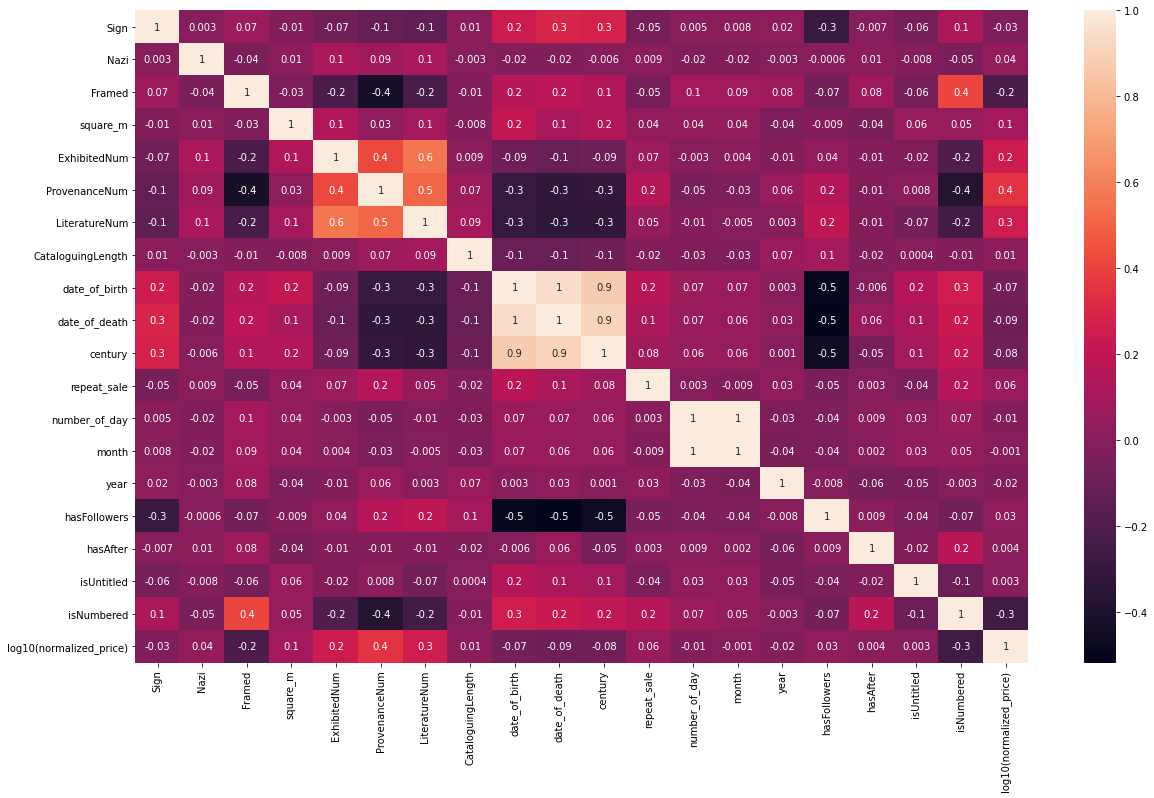

In [27]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(train_set.corr(), annot = True, fmt='.1g')
plt.show()

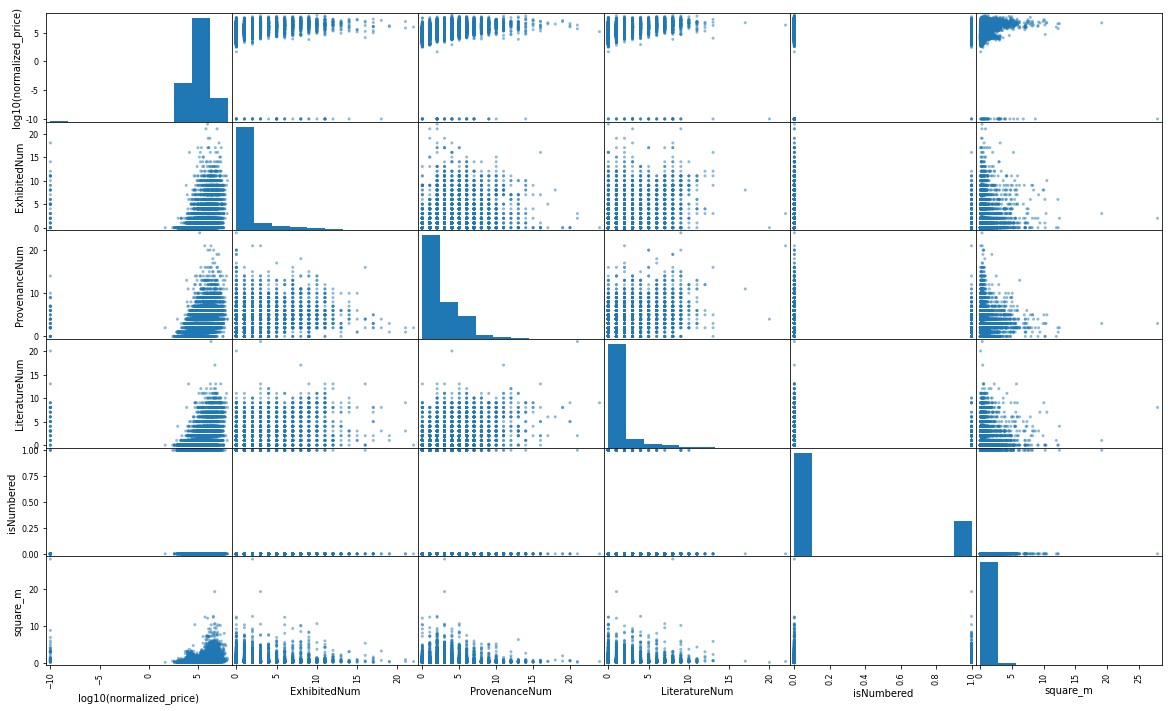

In [28]:
from pandas.plotting import scatter_matrix
attributes = ["log10(normalized_price)", "ExhibitedNum","ProvenanceNum","LiteratureNum","isNumbered","square_m"]
scatter_matrix(train_set[attributes], figsize=(20, 12))
plt.show()

In [29]:
train_set = train_set.drop(columns=["log10(normalized_price)"]).copy()
test_set = test_set.drop(columns=["log10(normalized_price)"]).copy()

data_num = train_set.select_dtypes(include=['int64', 'float64'])
data_cat = train_set.select_dtypes(include='object')

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin


class CreateDummies(BaseEstimator, TransformerMixin):
    def __init__(self,):
        pass
    def fit(self, X):
        return self
    def transform(self, X):
        return pd.get_dummies(pd.DataFrame(X)).values

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

    
num_pipeline = Pipeline([
('selector', DataFrameSelector(data_num.columns)),
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])

In [34]:
cat_pipeline = Pipeline([
('selector', DataFrameSelector(data_cat.columns)),
('create_dummies', CreateDummies()),
])

In [35]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])

In [37]:
train_prepared = full_pipeline.fit_transform(train_set)
np.shape(data_prepared)

(11629, 219)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_label)

scores = cross_val_score(lin_reg, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)


In [41]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(lin_rmse_scores)

Scores: [6.21259259e+09 1.86664507e+08 9.78979407e-01 9.22362427e+08
 1.41430286e+09 1.02895170e+09 1.79603010e+09 4.61062852e+07
 1.83751557e+08 2.33074393e+08]
Mean: 1202383641.6377826
Standard deviation: 1771992408.1898296


In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prepared, train_label)

scores = cross_val_score(tree_reg, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [44]:
display_scores(tree_rmse_scores)

Scores: [1.5479174  1.30585306 1.39692462 1.42840259 1.21421209 1.70535584
 1.58026477 1.56220897 1.90131042 1.85314617]
Mean: 1.549559594835328
Standard deviation: 0.21239084574792466


In [47]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, train_label)

scores = cross_val_score(forest_reg, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [48]:
display_scores(tree_rmse_scores)

Scores: [1.1927988  0.79743653 0.9978261  0.89242598 0.97253148 1.2739393
 1.13241938 0.94471179 1.59498794 1.31721681]
Mean: 1.1116294107965243
Standard deviation: 0.2271992654269455
